## Import libraries

In [1]:
import numpy as np  # numpy!
import seaborn as sns # visualisation!
import matplotlib.pyplot as plt # visualisation!
import pandas as pd # dataframes & data analysis!

## Load Data

In [2]:
dataset = '1_-_Project_Data.csv'
df = pd.read_csv(dataset)

In [3]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


## Data Check

In [31]:
df.shape

(7043, 31)

In [37]:
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [42]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

### Churn info

In [30]:
print(f" The Churn Labels are {df['Churn Label'].unique()}")
print(f" With the respective values of {df['Churn Value'].unique()}")
print(" The availabe reasons for churning are :")
df['Churn Reason'].value_counts()

 The Churn Labels are ['Yes' 'No']
 With the respective values of [1 0]
 The availabe reasons for churning are :


Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Limited range of services                     44
Long distance charges                         44
Lack of affordable download/upload speed      44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: Churn Reason, 

In [19]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

In [20]:
df['Churn Label'].value_counts()

No     5174
Yes    1869
Name: Churn Label, dtype: int64

## New dataframe of thoes who left and thoes who stayed

In [35]:
stayed = df[df['Churn Value'] == 0]
stayed['Churn Value'].value_counts()

0    5174
Name: Churn Value, dtype: int64

In [36]:
not_stay = df[df['Churn Value'] == 1]
not_stay['Churn Value'].value_counts()

1    1869
Name: Churn Value, dtype: int64

## Finding correlations between features

In [49]:
# Selecting the columns
selected_columns = df[['Churn Value', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude' ]]

# Calculating the correlation
correlation = selected_columns.corr()

print(correlation)


             Churn Value  Zip Code  Latitude  Longitude
Churn Value     1.000000  0.003346 -0.003384   0.004594
Zip Code        0.003346  1.000000  0.895743  -0.784271
Latitude       -0.003384  0.895743  1.000000  -0.876779
Longitude       0.004594 -0.784271 -0.876779   1.000000


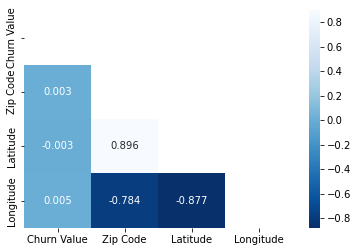

In [50]:
sns.heatmap(selected_columns.corr(), 
            annot=True,
            fmt='.3f',
            cmap='Blues_r',
            mask=np.triu(selected_columns.corr()))
plt.show()

## Contents of the columns for potential encoding 

In [61]:
for i in df.columns:
    if len(df[i].unique()) <= 4 :
        print(f'{i} : {df[i].unique()}')
    else:
        pass

Count : [1]
Country : ['United States']
State : ['California']
Gender : ['Male' 'Female']
Senior Citizen : ['No' 'Yes']
Partner : ['No' 'Yes']
Dependents : ['No' 'Yes']
Phone Service : ['Yes' 'No']
Multiple Lines : ['No' 'Yes' 'No phone service']
Internet Service : ['DSL' 'Fiber optic' 'No']
Online Security : ['Yes' 'No' 'No internet service']
Online Backup : ['Yes' 'No' 'No internet service']
Device Protection : ['No' 'Yes' 'No internet service']
Tech Support : ['No' 'Yes' 'No internet service']
Streaming TV : ['No' 'Yes' 'No internet service']
Streaming Movies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'Two year' 'One year']
Paperless Billing : ['Yes' 'No']
Payment Method : ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn Label : ['Yes' 'No']
Churn Value : [1 0]
